<a href="https://colab.research.google.com/github/akshayabhale1406/SCLR_Delhivery_FE/blob/main/Delhivery_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Delhivery - Feature Engineering**

## Problem Statement : About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

 **Approach to understanding the problem and getting to insights**

First we will understand the data we have received, and then check what possible operation we can do to analyse the data better and observe patterns to provide solutions.

### Importing the relevant libraries

In [430]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Loading CSV as Dataset

In [431]:
df = pd.read_csv("/content/sample_data/delhivery_data.csv")

<ipython-input-431-483eed020ee8>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sample_data/delhivery_data.csv")




### Checking if the data is loaded as dataframe

In [432]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9.0,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18.0,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27.0,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36.0,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39.0,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Checking the shape of the data

In [433]:
df.shape

(136557, 24)

### Checking column name

In [434]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

**OBSERVATION**: This data consists of 136557 checkpoints described across 24 columns.


### Checking data type of each column

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136557 entries, 0 to 136556
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            136557 non-null  object 
 1   trip_creation_time              136557 non-null  object 
 2   route_schedule_uuid             136557 non-null  object 
 3   route_type                      136557 non-null  object 
 4   trip_uuid                       136557 non-null  object 
 5   source_center                   136557 non-null  object 
 6   source_name                     136285 non-null  object 
 7   destination_center              136557 non-null  object 
 8   destination_name                136329 non-null  object 
 9   od_start_time                   136556 non-null  object 
 10  od_end_time                     136556 non-null  object 
 11  start_scan_to_end_scan          136556 non-null  float64
 12  is_cutoff       

**OBSERVATION**: The time column should be of correct datatype, that is: datetime

### Convert the od_start_time and od_end_time to datetime data type

In [436]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136557 entries, 0 to 136556
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            136557 non-null  object        
 1   trip_creation_time              136557 non-null  datetime64[ns]
 2   route_schedule_uuid             136557 non-null  object        
 3   route_type                      136557 non-null  object        
 4   trip_uuid                       136557 non-null  object        
 5   source_center                   136557 non-null  object        
 6   source_name                     136285 non-null  object        
 7   destination_center              136557 non-null  object        
 8   destination_name                136329 non-null  object        
 9   od_start_time                   136556 non-null  datetime64[ns]
 10  od_end_time                     136556 non-null  datetim

### Checking for missing vaules in column

In [438]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,272
destination_center,0
destination_name,228
od_start_time,1


**OBSERVATION**: There are missing values in  columns: source_name, destination_name, and segment factor. Since the missing values are less than 1% of the total data, we can directly drop the NULL values.



### Dropping the NULL values from the dataset

In [439]:
df = df.dropna(how ='any')

### Checking the shape of data after dropping NULL Values

In [440]:
df.shape

(136059, 24)

**OBSERVATION**: The new dataset is decreased by less than 1% of the actual raw dataset. This is acceptable for further Data Analysis.

In [441]:
df_null_check = df.isnull().sum()

### Checking to see if there are any NULL values in the new dataset.

In [442]:
df_null_check

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**OBSERVATION**: No NULL values in the new dataset.

### Checking the statistical summary of raw data

In [443]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,136059,136059,136059,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000,136059.000000
mean,2018-09-22 12:37:09.315812352,2018-09-22 17:02:24.815698432,2018-09-23 09:14:34.558658816,971.666520,235.486304,236.630012,421.868241,216.106983,287.867493,2.121783,36.181539,18.499283,22.832336,2.218249
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000055,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 02:21:59.831977984,2018-09-17 06:26:04.219940096,2018-09-18 01:02:03.127152896,162.000000,22.000000,23.386336,52.000000,27.000000,30.000250,1.607143,20.000000,11.000000,12.083750,1.350000
50%,2018-09-22 02:14:33.861478912,2018-09-22 06:18:11.753445888,2018-09-23 02:08:09.761019904,456.000000,66.000000,66.217249,133.000000,65.000000,79.179300,1.858311,29.000000,17.000000,23.524500,1.684211
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:05:12.999181056,2018-09-28 12:13:41.675546112,1673.000000,286.000000,287.854860,525.000000,265.000000,351.936200,2.214286,40.000000,22.000000,27.813350,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 00:08:33.866586,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,NaN,NaN,NaN,1042.379854,346.228069,346.454324,602.208577,309.264246,422.952744,1.716386,52.947569,14.507476,17.461641,4.882753


### Checking if any orders are returned to source location.

In [444]:
returned_orders = df.groupby("trip_uuid").apply(lambda group: pd.DataFrame({"Returned_Packages": [any(group["source_center"] == group["destination_center"])]})).reset_index()
returned_orders.head()

<ipython-input-444-887a70d66ffd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  returned_orders = df.groupby("trip_uuid").apply(lambda group: pd.DataFrame({"Returned_Packages": [any(group["source_center"] == group["destination_center"])]})).reset_index()


,trip_uuid,level_1,Returned_Packages
0,trip-153671041653548748,0,False
1,trip-153671042288605164,0,False
2,trip-153671043369099517,0,False
3,trip-153671046011330457,0,False
4,trip-153671052974046625,0,False


In [445]:
true_instances = returned_orders[returned_orders['Returned_Packages'] == True].index.tolist()
true_instances

[]

**OBSERVATION**: The below shows if any values are TRUE for Returned_Packages. Since the returned list is empty, it means no packages were returned.

### The current details are split for different trips as per different check-points for that trips. Data can be analysed better if the times of each check-points can be summed up for each trip ID.

In [446]:
df_combined_times = df.groupby("trip_uuid")[["segment_actual_time", "segment_osrm_time", "segment_osrm_distance"]].sum()
df_combined_times["segment_osrm_distance"] = np.round(df_combined_times["segment_osrm_distance"], 2)
df_combined_times = df_combined_times.rename(columns = {"segment_osrm_time" : "accumulated_osrm_time", "segment_actual_time" : "accumulated_actual_time", "segment_osrm_distance" : "accumulated_osrm_distance"})
df_combined_times.head()

,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance
trip_uuid,,,
trip-153671041653548748,1548.0,1008.0,1320.47
trip-153671042288605164,141.0,65.0,84.19
trip-153671043369099517,3308.0,1941.0,2545.27
trip-153671046011330457,59.0,16.0,19.88
trip-153671052974046625,340.0,115.0,146.79


In [447]:
df_combined_times_1 = df.groupby(["trip_uuid","destination_center"])[["actual_time", "osrm_time", "osrm_distance"]].last()
df_combined_times_1 = df_combined_times_1.reset_index()
df_combined_times_1 = df_combined_times_1.groupby("trip_uuid")[["actual_time", "osrm_time", "osrm_distance"]].sum()
df_combined_times_1.head()

,actual_time,osrm_time,osrm_distance
trip_uuid,,,
trip-153671041653548748,1562.0,717.0,991.3523
trip-153671042288605164,143.0,68.0,85.1110
trip-153671043369099517,3347.0,1740.0,2354.0665
trip-153671046011330457,59.0,15.0,19.6800
trip-153671052974046625,341.0,117.0,146.7918


### Calculation of time difference between OSRM time and Actual Time to know how much time error present present in the OSRM time calculation.

In [448]:
df_combined_times_1 = df_combined_times_1.reset_index()
df_combined_times = pd.merge(df_combined_times, df_combined_times_1, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918


### Creating a dataframe with custom names and necessary features to analyse data in a better way.

In [449]:
od_start_time = df.groupby('trip_uuid')['od_start_time'].first()
od_start_time = od_start_time.reset_index()
od_start_time = od_start_time.rename(columns={'od_start_time': 'trip_start_time'})
df_combined_times = df_combined_times.merge(od_start_time, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times["trip_start_date"] = df_combined_times["trip_start_time"].dt.date
trip_start_location = df.groupby('trip_uuid')['source_name'].first()
trip_end_location = df.groupby('trip_uuid')['destination_name'].last()
trip_end_location = trip_end_location.reset_index()
trip_start_location = trip_start_location.reset_index()
df_combined_times = df_combined_times.merge(trip_start_location, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times = df_combined_times.merge(trip_end_location, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times = df_combined_times.drop(columns=['trip_start_time'])
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana)
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka)
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab)
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra)
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka)


In [450]:
od_start_time = df.groupby('trip_uuid')['od_start_time'].first()
od_start_time = od_start_time.reset_index()
od_start_time = od_start_time.rename(columns={'od_start_time': 'trip_start_time'})
df_combined_times = df_combined_times.merge(od_start_time, on='trip_uuid', how='left').reset_index(drop=True)
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725


### Creating a column for Starting Point and Ending Point of a trip using States names

In [451]:
df_combined_times["source_name"] = df_combined_times["source_name"].str.split("(").str[1]
df_combined_times["source_name"] = df_combined_times["source_name"].str.split(")").str[0]
df_combined_times["source_name"] = df_combined_times["source_name"].apply(lambda x : x.upper())
df_combined_times["destination_name"] = df_combined_times["destination_name"].str.split("(").str[1]
df_combined_times["destination_name"] = df_combined_times["destination_name"].str.split(")").str[0]
df_combined_times["destination_name"] = df_combined_times["destination_name"].apply(lambda x : x.upper())
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725


In [452]:
od_start = df.groupby('trip_uuid')['od_start_time'].first()
od_end = df.groupby('trip_uuid')['od_end_time'].last()
df_combined_times = df_combined_times.set_index('trip_uuid').merge(od_start, left_index=True, right_index=True).reset_index()
df_combined_times = df_combined_times.set_index('trip_uuid').merge(od_end, left_index=True, right_index=True).reset_index()
df_combined_times["trip_duration"] = (df_combined_times["od_end_time"] - df_combined_times["od_start_time"]).dt.total_seconds()/60
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2260.109800
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,181.611874
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3934.362520
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.494935
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,718.349042


In [453]:
df_start_t_to_end_t = df.groupby("trip_uuid")[["start_scan_to_end_scan","actual_distance_to_destination"]].last()
df_start_t_to_end_t = df_start_t_to_end_t.reset_index()
df_combined_times = df_combined_times.merge(df_start_t_to_end_t, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration,start_scan_to_end_scan,actual_distance_to_destination
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2260.109800,1260.0,383.759164
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,181.611874,58.0,24.644021
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3934.362520,834.0,237.439610
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.494935,100.0,17.175274
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,718.349042,485.0,41.317614


In [454]:
df_route_type = df.groupby("trip_uuid")["route_type"].first()
df_route_type.reset_index()
df_combined_times = df_combined_times.merge(df_route_type, on = "trip_uuid")
df_combined_times.head()

,trip_uuid,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_date,source_name,destination_name,trip_start_time,od_start_time,od_end_time,trip_duration,start_scan_to_end_scan,actual_distance_to_destination,route_type
0,trip-153671041653548748,1548.0,1008.0,1320.47,1562.0,717.0,991.3523,2018-09-12,MADHYA PRADESH,HARYANA,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2260.109800,1260.0,383.759164,FTL
1,trip-153671042288605164,141.0,65.0,84.19,143.0,68.0,85.1110,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,181.611874,58.0,24.644021,Carting
2,trip-153671043369099517,3308.0,1941.0,2545.27,3347.0,1740.0,2354.0665,2018-09-12,KARNATAKA,PUNJAB,2018-09-12 00:00:33.691250,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3934.362520,834.0,237.439610,FTL
3,trip-153671046011330457,59.0,16.0,19.88,59.0,15.0,19.6800,2018-09-12,MAHARASHTRA,MAHARASHTRA,2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.494935,100.0,17.175274,Carting
4,trip-153671052974046625,340.0,115.0,146.79,341.0,117.0,146.7918,2018-09-12,KARNATAKA,KARNATAKA,2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,718.349042,485.0,41.317614,FTL


### Organising the columns in a better way

In [455]:
df_combined_times.describe()

,accumulated_actual_time,accumulated_osrm_time,accumulated_osrm_distance,actual_time,osrm_time,osrm_distance,trip_start_time,od_start_time,od_end_time,trip_duration,start_scan_to_end_scan,actual_distance_to_destination
count,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886,13886,13886,13886.000000,13886.000000,13886.000000
mean,354.517068,181.261270,223.717758,357.224471,161.361011,204.427524,2018-09-22 13:11:41.328608768,2018-09-22 13:11:41.328608768,2018-09-22 22:19:10.214335232,547.481429,366.983869,112.203313
min,9.000000,6.000000,9.070000,9.000000,6.000000,9.072900,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,23.461468,20.000000,9.002461
25%,66.000000,30.000000,32.540000,67.000000,29.000000,30.715050,2018-09-17 03:49:13.747945728,2018-09-17 03:49:13.747945728,2018-09-17 13:56:55.833727488,151.212210,112.000000,20.336659
50%,147.000000,65.000000,69.890000,148.500000,60.000000,65.279050,2018-09-22 03:44:51.733427968,2018-09-22 03:44:51.733427968,2018-09-22 14:41:42.175042560,288.308647,193.000000,35.482491
75%,364.000000,184.000000,217.410000,367.000000,168.000000,206.312975,2018-09-27 19:52:50.196828928,2018-09-27 19:52:50.196828928,2018-09-28 04:48:22.607869952,672.193738,387.000000,75.766009
max,6230.000000,2564.000000,3523.630000,6265.000000,2032.000000,2840.081000,2018-10-04 20:15:07.233819,2018-10-04 20:15:07.233819,2018-10-08 03:00:24.353479,7898.551955,7898.000000,1927.447705
std,558.675986,315.760533,418.230841,563.367162,272.139846,371.500357,NaN,NaN,NaN,670.405221,512.948026,249.958253


In [456]:
df_combined_times = df_combined_times.loc[:, ['trip_uuid', 'route_type', 'source_name', 'trip_start_date', 'destination_name', 'od_end_time', 'trip_duration', "actual_distance_to_destination", 'start_scan_to_end_scan', 'actual_time', 'accumulated_actual_time', 'osrm_time', 'accumulated_osrm_time', 'osrm_distance', 'accumulated_osrm_distance']]
df_combined_times["od_end_time"] = df_combined_times["od_end_time"].dt.date
df_combined_times = df_combined_times.rename(columns = {"od_end_time" : "trip_end_date"})
df_combined_times.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671041653548748,FTL,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,383.759164,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
1,trip-153671042288605164,Carting,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,24.644021,58.0,143.0,141.0,68.0,65.0,85.1110,84.19
2,trip-153671043369099517,FTL,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,237.439610,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
3,trip-153671046011330457,Carting,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,17.175274,100.0,59.0,59.0,15.0,16.0,19.6800,19.88
4,trip-153671052974046625,FTL,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,41.317614,485.0,341.0,340.0,117.0,115.0,146.7918,146.79


### Checking which day was most busy in the data.

In [457]:
most_busy_days = df_combined_times['trip_start_date'].value_counts().sort_index()
most_busy_days

,count
trip_start_date,
2018-09-12,647
2018-09-13,689
2018-09-14,662
2018-09-15,775
2018-09-16,570
2018-09-17,672
2018-09-18,743
2018-09-19,641
2018-09-20,675


[Text(0.5, 0, 'Number of trips'),
 Text(0, 0.5, 'Trip Date'),
 Text(0.5, 1.0, 'Plot of Number of Trip v/s Trip Date')]

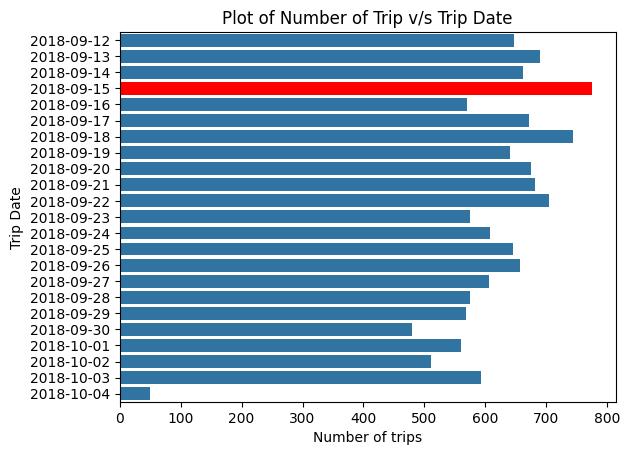

In [458]:
most_busy_days = df_combined_times['trip_start_date'].value_counts().sort_index().reset_index()
most_busy_day = sns.barplot(data = most_busy_days, x = "count", y = "trip_start_date")
bars = most_busy_day.patches
bars[3].set_facecolor("red")
# bars[6].set_facecolor("orange")
# bars[10].set_facecolor("green")
most_busy_day.set(xlabel ="Number of trips", ylabel = "Trip Date", title ='Plot of Number of Trip v/s Trip Date')

**OBSERVATION** : 15th September, 2018 had the most number of trips - 775 trips.

### Checking which State handles most trips.

In [459]:
df_top_10_city = df_combined_times["source_name"].value_counts().head(10)

df_top_10_destination_name = df_combined_times["destination_name"].value_counts().head(10)

df_most_busy_city = df_top_10_city.reset_index().merge(df_top_10_destination_name.reset_index(), left_on="source_name", right_on="destination_name")

df_most_busy_city = df_most_busy_city.rename(columns={"source_name": "city_name"})

df_most_busy_city = df_most_busy_city.drop(columns=["destination_name"])

df_most_busy_city = df_most_busy_city.rename(columns = {"count_x" : "from_state", "count_y" : "to_state"})

df_most_busy_city

,city_name,from_state,to_state
0,MAHARASHTRA,2524,2440
1,KARNATAKA,2089,2144
2,HARYANA,1574,1568
3,TAMIL NADU,1018,1004
4,DELHI,756,635
5,TELANGANA,733,789
6,GUJARAT,692,704
7,UTTAR PRADESH,677,692
8,WEST BENGAL,632,667
9,PUNJAB,587,647


<Axes: xlabel='city_name'>

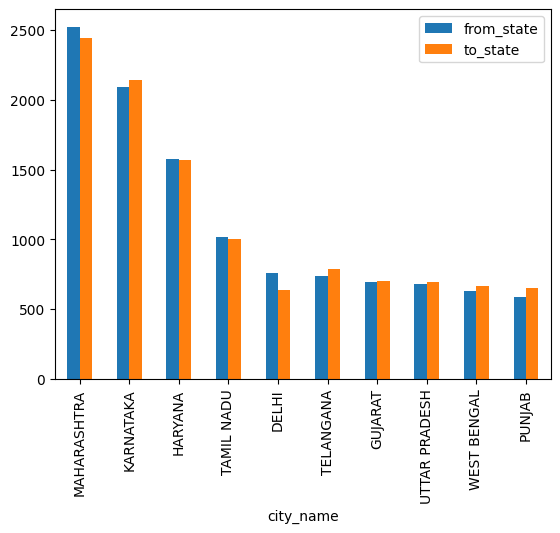

In [460]:
df_most_busy_city.plot(x = "city_name", y=["from_state", "to_state"], kind="bar")

OBSERVATION : Maharashtra is the busiest state handling 2682 trips as source_center and 2591 trips as destination_center. It is followed by Karnataka and Haryana.

In [461]:
df_bottom_10_city = df_combined_times["source_name"].value_counts().tail(13)

df_bottom_10_destination_name = df_combined_times["destination_name"].value_counts().tail(13)

df_least_busy_city = df_bottom_10_city.reset_index().merge(df_bottom_10_destination_name.reset_index(), left_on="source_name", right_on="destination_name")

df_least_busy_city = df_least_busy_city.rename(columns={"source_name": "city_name"})

df_least_busy_city = df_least_busy_city.drop(columns=["destination_name"])

df_least_busy_city = df_least_busy_city.rename(columns = {"count_x" : "from_state", "count_y" : "to_state"})

df_least_busy_city

,city_name,from_state,to_state
0,GOA,62,60
1,CHANDIGARH,43,27
2,CHHATTISGARH,40,40
3,HIMACHAL PRADESH,31,36
4,JAMMU & KASHMIR,16,14
5,DADRA AND NAGAR HAVELI,15,13
6,PONDICHERRY,12,10
7,MIZORAM,4,6
8,NAGALAND,4,1
9,ARUNACHAL PRADESH,3,22


<Axes: xlabel='city_name'>

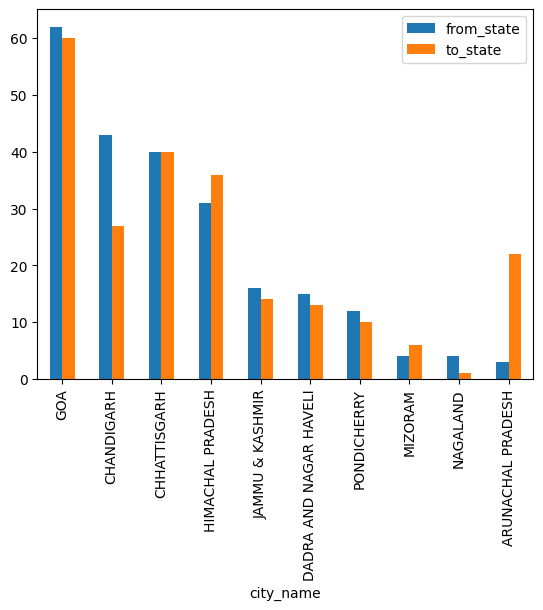

In [462]:
df_least_busy_city.plot(x = "city_name", y=["from_state", "to_state"], kind="bar")

OBSERVATION : Nagaland is the least busiest state handling 5 trips as source_center and 1 trips as destination_center. It is followed by Mizoram.

### Checking busiest inter-state corridor

In [463]:
busy_corridor =  df_combined_times[df_combined_times["source_name"] != df_combined_times["destination_name"]]

busiest_corridor_trip_count = busy_corridor.groupby(["source_name", "destination_name"])["trip_uuid"].count().sort_values(ascending=False)
busiest_corridor_trip_count = busiest_corridor.reset_index()
busiest_corridor.head()

,source_name,destination_name,trip_uuid
0,DELHI,HARYANA,378
1,HARYANA,DELHI,294
2,DELHI,UTTAR PRADESH,90
3,HARYANA,UTTAR PRADESH,88
4,HARYANA,PUNJAB,78


In [464]:
busy_corridor

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671041653548748,FTL,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,383.759164,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
2,trip-153671043369099517,FTL,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,237.439610,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
12,trip-153671121411074590,FTL,TELANGANA,2018-09-12,KARNATAKA,2018-09-12,996.217031,177.510885,499.0,809.0,802.0,428.0,492.0,542.0812,623.38
15,trip-153671143043841452,FTL,UTTAR PRADESH,2018-09-12,MADHYA PRADESH,2018-09-12,514.616477,129.749996,514.0,289.0,287.0,132.0,130.0,184.6407,184.82
33,trip-153671320412492075,FTL,KARNATAKA,2018-09-12,TELANGANA,2018-09-12,916.941170,163.989437,320.0,739.0,732.0,430.0,471.0,546.2340,596.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,trip-153860641799000683,Carting,DELHI,2018-10-03,HARYANA,2018-10-04,238.373830,40.489470,238.0,110.0,110.0,52.0,55.0,42.5990,49.95
13822,trip-153860698042160875,FTL,MAHARASHTRA,2018-10-03,PUNJAB,2018-10-05,2661.132086,173.510827,635.0,2003.0,1979.0,1166.0,1349.0,1607.8305,1747.45
13824,trip-153860723585992237,FTL,KARNATAKA,2018-10-03,TELANGANA,2018-10-04,781.643506,96.160037,222.0,556.0,553.0,297.0,383.0,354.4867,432.50
13831,trip-153860787916550213,Carting,DELHI,2018-10-03,HARYANA,2018-10-04,128.067879,45.977014,128.0,69.0,67.0,52.0,57.0,56.3162,64.36


In [465]:
busiest_corridor_avg_time = busy_corridor.groupby(["source_name", "destination_name"])["actual_time"].mean().sort_values(ascending=False)
busiest_corridor_avg_time = busiest_corridor_avg_time.reset_index()
busiest_corridor_avg_time

,source_name,destination_name,actual_time
0,ASSAM,MAHARASHTRA,5457.000000
1,MAHARASHTRA,ASSAM,5067.000000
2,TAMIL NADU,HARYANA,3606.000000
3,KARNATAKA,PUNJAB,3376.562500
4,PUNJAB,KARNATAKA,3374.666667
...,...,...,...
125,UTTAR PRADESH,RAJASTHAN,92.333333
126,PUNJAB,CHANDIGARH,69.538462
127,DADRA AND NAGAR HAVELI,GUJARAT,48.333333
128,GUJARAT,DAMAN & DIU,43.000000


In [466]:
busiest_corridor_avg_dist = busy_corridor.groupby(["source_name", "destination_name"])["actual_distance_to_destination"].mean().sort_values(ascending=False)
busiest_corridor_avg_dist = busiest_corridor_avg_dist.reset_index()
busiest_corridor_avg_dist.head()

,source_name,destination_name,actual_distance_to_destination
0,HARYANA,TAMIL NADU,1721.318473
1,PUNJAB,KARNATAKA,1703.183750
2,HARYANA,KARNATAKA,1689.694725
3,MAHARASHTRA,WEST BENGAL,1628.807438
4,ASSAM,MAHARASHTRA,1628.663803


In [467]:
df_busiest_corridor_info = busiest_corridor_trip_count.merge(busiest_corridor_avg_time, on = ["source_name", "destination_name"])
df_busiest_corridor_info = df_busiest_corridor_info.merge(busiest_corridor_avg_dist, on = ["source_name", "destination_name"])
df_busiest_corridor_info = df_busiest_corridor_info.rename(columns = {"trip_uuid" : "trip_count", "actual_time" : "avg_time", "actual_distance_to_destination" : "avg_distance"})
df_busiest_corridor_info.head()

,index,source_name,destination_name,trip_count,avg_time,avg_distance
0,0,DELHI,HARYANA,378,142.150794,41.308429
1,1,HARYANA,DELHI,294,123.370748,44.194511
2,2,DELHI,UTTAR PRADESH,90,398.266667,130.901959
3,3,HARYANA,UTTAR PRADESH,88,317.988636,109.622126
4,4,HARYANA,PUNJAB,78,369.358974,167.022416


**OBSERVATION** : The busiest inter-city corridor is Delhi - Haryana with trip_count of 378, avg_time for trip of 142.15 and avg_distance of 41.3.

## HYPOTHESIS TESTING:

1) Testing if the difference trip_duration and start_scan_to_end_scan is significant using **TWO SAMPLE T-TEST**

In [468]:
df_tdsses = df_combined_times.copy()
df_tdsses["diff_trip_duration_scan"] = df_tdsses["trip_duration"] - df_tdsses["start_scan_to_end_scan"]
df_tdsses.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
0,trip-153671041653548748,FTL,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,383.759164,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47,1000.109800
1,trip-153671042288605164,Carting,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,24.644021,58.0,143.0,141.0,68.0,65.0,85.1110,84.19,123.611874
2,trip-153671043369099517,FTL,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,237.439610,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27,3100.362520
3,trip-153671046011330457,Carting,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,17.175274,100.0,59.0,59.0,15.0,16.0,19.6800,19.88,0.494935
4,trip-153671052974046625,FTL,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,41.317614,485.0,341.0,340.0,117.0,115.0,146.7918,146.79,233.349042


In [469]:
df_tdsses.describe()

,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
count,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000,13886.000000
mean,547.481429,112.203313,366.983869,357.224471,354.517068,161.361011,181.261270,204.427524,223.717758,180.497560
std,670.405221,249.958253,512.948026,563.367162,558.675986,272.139846,315.760533,371.500357,418.230841,366.180658
min,23.461468,9.002461,20.000000,9.000000,9.000000,6.000000,6.000000,9.072900,9.070000,0.000240
25%,151.212210,20.336659,112.000000,67.000000,66.000000,29.000000,30.000000,30.715050,32.540000,0.412893
50%,288.308647,35.482491,193.000000,148.500000,147.000000,60.000000,65.000000,65.279050,69.890000,0.827510
75%,672.193738,75.766009,387.000000,367.000000,364.000000,168.000000,184.000000,206.312975,217.410000,237.263705
max,7898.551955,1927.447705,7898.000000,6265.000000,6230.000000,2032.000000,2564.000000,2840.081000,3523.630000,3575.097420


### Creating a function to remove outliers from data

In [470]:
def remove_outliers_iqr(df_in, column_in):
  q1 = df_in[column_in].quantile(0.25)
  q2 = df_in[column_in].quantile(0.75)
  iqr = q2 -q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q2 + 1.5 * iqr
  df_out = df_in[(df_in[column_in] >= lower_bound) & (df_in[column_in] <= upper_bound)]

  return df_out


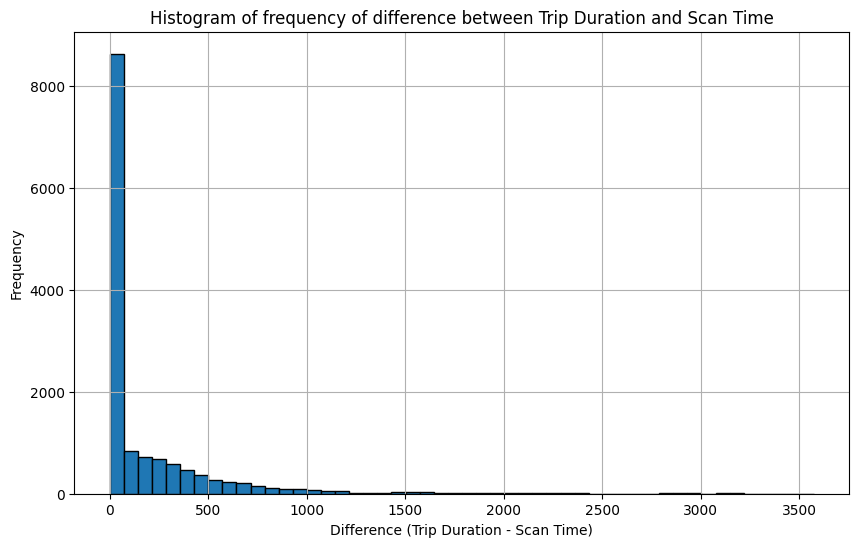

In [471]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_tdsses["diff_trip_duration_scan"], bins=50, edgecolor='black')
plt.xlabel("Difference (Trip Duration - Scan Time)")
plt.ylabel("Frequency")
plt.title("Histogram of frequency of difference between Trip Duration and Scan Time")
plt.grid(True)
plt.show()

### One trip has 3575 min difference between trip_duration and start_scan_to_end_scan. Delhivery needs to see in detail what happened during this trip to avoid similar time delay on other trips.

In [472]:
most_delayed_trip = df_tdsses[df_tdsses["diff_trip_duration_scan"] == df_tdsses["diff_trip_duration_scan"].max()]
most_delayed_trip

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
7192,trip-153762877083011555,FTL,KARNATAKA,2018-09-22,PUNJAB,2018-09-25,4395.09742,236.729936,820.0,3525.0,3485.0,1737.0,2032.0,2351.8166,2638.46,3575.09742


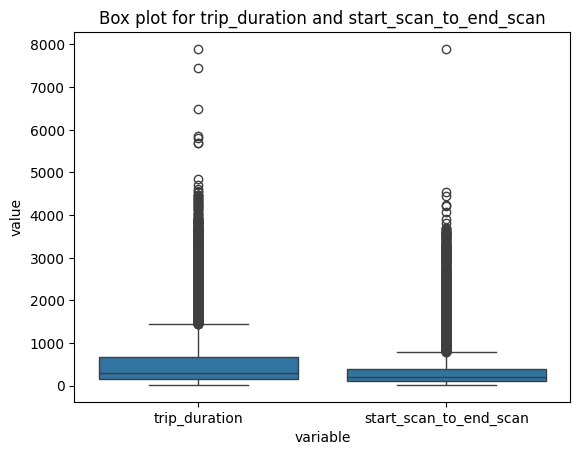

In [473]:
df_melted = pd.melt(df_tdsses.reset_index(), id_vars = ["index"], value_vars = ["trip_duration", "start_scan_to_end_scan"])

sns.boxplot(x = "variable", y = "value", data = df_melted)

plt.title("Box plot for trip_duration and start_scan_to_end_scan")
plt.show()

### Removing outliers from the data for first hypothesis testing and plot

In [474]:
data_without_outliers = remove_outliers_iqr(df_tdsses, 'diff_trip_duration_scan')

In [475]:
data_without_outliers.describe()

,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance,diff_trip_duration_scan
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,434.753024,101.212537,345.697542,281.652498,279.243854,124.824187,139.981285,155.603643,169.867538,89.055482
std,522.946584,241.232971,499.455847,453.692249,449.624460,217.165045,252.768832,296.473378,333.502648,151.063715
min,23.461468,9.002461,20.000000,9.000000,9.000000,6.000000,6.000000,9.072900,9.070000,0.000240
25%,142.736354,19.409633,108.000000,63.000000,62.000000,28.000000,29.000000,29.040850,30.320000,0.374732
50%,254.301224,32.211022,182.000000,126.000000,124.000000,53.000000,57.000000,52.853700,58.830000,0.750688
75%,505.013967,64.024816,345.000000,292.000000,289.000000,129.000000,148.000000,155.110150,164.420000,140.743405
max,7898.551955,1927.447705,7898.000000,4532.000000,4504.000000,1686.000000,1938.000000,2326.199100,2640.920000,592.167520


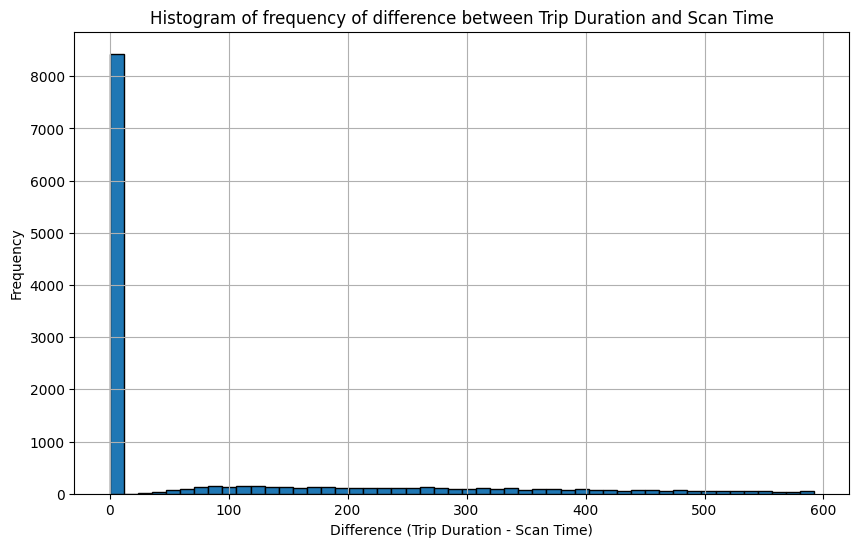

In [476]:
plt.figure(figsize=(10, 6))
plt.hist(data_without_outliers["diff_trip_duration_scan"], bins=50, edgecolor='black')
plt.xlabel("Difference (Trip Duration - Scan Time)")
plt.ylabel("Frequency")
plt.title("Histogram of frequency of difference between Trip Duration and Scan Time")
plt.grid(True)
plt.show()

In [477]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel(data_without_outliers["trip_duration"], data_without_outliers["start_scan_to_end_scan"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the trip_duration and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the trip_duration and start_scan_to_end_scan.")

t-statistic: 66.20000827034092
p-value: 0.0
Reject the null hypothesis. There is a significant difference between the trip_duration and start_scan_to_end_scan.


actual_time aggregated value and OSRM time aggregated value


In [478]:
df_act_osrm_diff = df_combined_times["actual_time"] - df_combined_times["osrm_time"]
df_act_osrm_test = pd.concat([df_combined_times["actual_time"], df_combined_times["osrm_time"], df_act_osrm_diff], axis = 1)
df_act_osrm_test = df_act_osrm_test.rename(columns = {0 : "diff_actual_time_osrm_time"})
df_act_osrm_test

,actual_time,osrm_time,diff_actual_time_osrm_time
0,1562.0,717.0,845.0
1,143.0,68.0,75.0
2,3347.0,1740.0,1607.0
3,59.0,15.0,44.0
4,341.0,117.0,224.0
...,...,...,...
13881,83.0,62.0,21.0
13882,21.0,12.0,9.0
13883,282.0,48.0,234.0
13884,264.0,179.0,85.0


In [479]:
df_act_osrm_test.describe()

,actual_time,osrm_time,diff_actual_time_osrm_time
count,13886.000000,13886.000000,13886.000000
mean,357.224471,161.361011,195.863460
std,563.367162,272.139846,312.036942
min,9.000000,6.000000,-58.000000
25%,67.000000,29.000000,33.000000
50%,148.500000,60.000000,81.000000
75%,367.000000,168.000000,200.750000
max,6265.000000,2032.000000,4235.000000


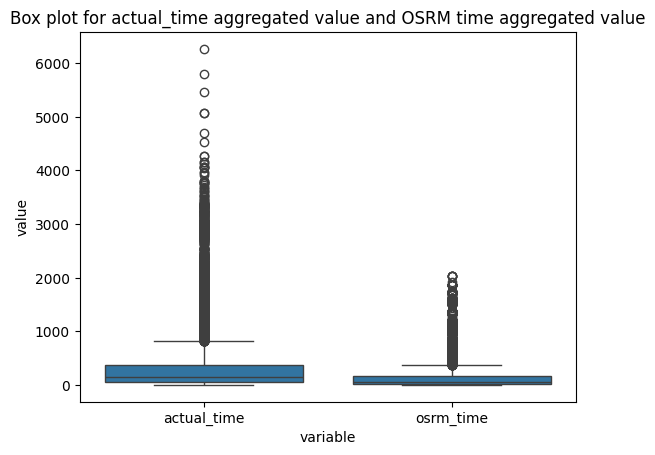

In [480]:
df_melted_1 = pd.melt(df_act_osrm_test.reset_index(), id_vars = ["index"], value_vars = ["actual_time", "osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_1)

plt.title("Box plot for actual_time aggregated value and OSRM time aggregated value")
plt.show()

### Removing outliers

In [481]:
df_act_osrm_test_wo_outliers = remove_outliers_iqr(df_act_osrm_test, 'diff_actual_time_osrm_time')

In [482]:
df_act_osrm_test_wo_outliers.describe()

,actual_time,osrm_time,diff_actual_time_osrm_time
count,12255.000000,12255.00000,12255.000000
mean,191.572664,90.04235,101.530314
std,181.943938,96.58130,98.634021
min,9.000000,6.00000,-58.000000
25%,62.000000,27.00000,29.000000
50%,120.000000,51.00000,65.000000
75%,266.500000,120.00000,144.000000
max,1160.000000,709.00000,452.000000


In [483]:
t_statistic, p_value = stats.ttest_rel(df_act_osrm_test_wo_outliers["actual_time"], df_act_osrm_test_wo_outliers["osrm_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of actual time and OSRM time.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of actual time and OSRM time.")


t-statistic: 113.95297059478418
p-value: 0.0
Reject the null hypothesis. There is a significant difference between the means of actual time and OSRM time.


### actual_time aggregated value and segment actual time aggregated value

In [484]:
df_atav = df.groupby(["trip_uuid", "destination_center"] )[["actual_time"]].last()
df_atav = df_atav.reset_index()
df_atav = df_atav.groupby("trip_uuid")["actual_time"].sum()
df_atav

,actual_time
trip_uuid,
trip-153671041653548748,1562.0
trip-153671042288605164,143.0
trip-153671043369099517,3347.0
trip-153671046011330457,59.0
trip-153671052974046625,341.0
...,...
trip-153861095625827784,83.0
trip-153861104386292051,21.0
trip-153861106442901555,282.0


In [485]:
df_atav_seg = df.groupby(["trip_uuid"])["segment_actual_time"].sum()
df_atav = df_atav.reset_index()
df_atav = df_atav.merge(df_atav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_atav = df_atav.reset_index()
df_atav

,index,trip_uuid,actual_time,segment_actual_time
0,0,trip-153671041653548748,1562.0,1548.0
1,1,trip-153671042288605164,143.0,141.0
2,2,trip-153671043369099517,3347.0,3308.0
3,3,trip-153671046011330457,59.0,59.0
4,4,trip-153671052974046625,341.0,340.0
...,...,...,...,...
13881,13881,trip-153861095625827784,83.0,82.0
13882,13882,trip-153861104386292051,21.0,21.0
13883,13883,trip-153861106442901555,282.0,281.0
13884,13884,trip-153861115439069069,264.0,258.0


In [486]:
df_atav["diff_actual_time_segment_actual_time"] = df_atav["actual_time"] - df_atav["segment_actual_time"]
df_atav

,index,trip_uuid,actual_time,segment_actual_time,diff_actual_time_segment_actual_time
0,0,trip-153671041653548748,1562.0,1548.0,14.0
1,1,trip-153671042288605164,143.0,141.0,2.0
2,2,trip-153671043369099517,3347.0,3308.0,39.0
3,3,trip-153671046011330457,59.0,59.0,0.0
4,4,trip-153671052974046625,341.0,340.0,1.0
...,...,...,...,...,...
13881,13881,trip-153861095625827784,83.0,82.0,1.0
13882,13882,trip-153861104386292051,21.0,21.0,0.0
13883,13883,trip-153861106442901555,282.0,281.0,1.0
13884,13884,trip-153861115439069069,264.0,258.0,6.0


In [487]:
df_atav.describe()

,index,actual_time,segment_actual_time,diff_actual_time_segment_actual_time
count,13886.000000,13886.000000,13886.000000,13886.000000
mean,6942.500000,357.224471,354.517068,2.707403
std,4008.687254,563.367162,558.675986,15.587310
min,0.000000,9.000000,9.000000,-692.000000
25%,3471.250000,67.000000,66.000000,1.000000
50%,6942.500000,148.500000,147.000000,1.000000
75%,10413.750000,367.000000,364.000000,3.000000
max,13885.000000,6265.000000,6230.000000,49.000000


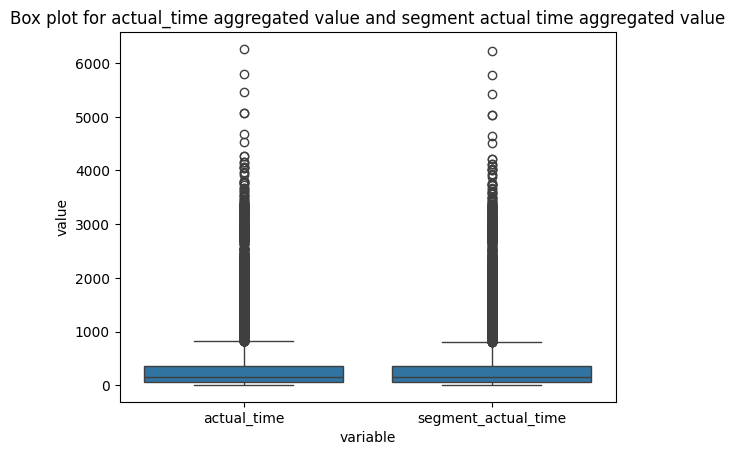

In [488]:
df_melted_2 = pd.melt(df_atav.reset_index(), id_vars = ["trip_uuid"], value_vars = ["actual_time", "segment_actual_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_2)

plt.title("Box plot for actual_time aggregated value and segment actual time aggregated value")
plt.show()

In [489]:
df_atav_out = remove_outliers_iqr(df_atav, "diff_actual_time_segment_actual_time")

In [490]:
df_atav_out.describe()

,index,actual_time,segment_actual_time,diff_actual_time_segment_actual_time
count,12226.000000,12226.000000,12226.000000,12226.000000
mean,6968.800671,206.758057,205.156306,1.601750
std,4024.241243,230.690712,229.885216,1.545385
min,1.000000,9.000000,9.000000,0.000000
25%,3491.250000,62.000000,61.000000,0.000000
50%,6984.500000,119.000000,118.000000,1.000000
75%,10474.750000,268.000000,265.000000,2.000000
max,13885.000000,3051.000000,3051.000000,6.000000


In [491]:
t_statistic, p_value = stats.ttest_rel(df_atav_out["actual_time"], df_atav_out["segment_actual_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between actual_time aggregated value and segment actual time aggregated value.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the actual_time aggregated value and segment actual time aggregated value.")

t-statistic: 114.60415429602853
p-value: 0.0
Reject the null hypothesis. There is a significant difference between actual_time aggregated value and segment actual time aggregated value.


### osrm distance aggregated value and segment osrm distance aggregated value

In [492]:
df_odav = df.groupby(["trip_uuid", "destination_center"] )[["osrm_distance"]].last()
df_odav = df_odav.reset_index()
df_odav = df_odav.groupby("trip_uuid")["osrm_distance"].sum()
df_odav

,osrm_distance
trip_uuid,
trip-153671041653548748,991.3523
trip-153671042288605164,85.1110
trip-153671043369099517,2354.0665
trip-153671046011330457,19.6800
trip-153671052974046625,146.7918
...,...
trip-153861095625827784,73.4630
trip-153861104386292051,16.0882
trip-153861106442901555,58.9037


In [493]:
df_odav_seg = df.groupby(["trip_uuid"])["segment_osrm_distance"].sum()
df_odav = df_odav.reset_index()
df_odav = df_odav.merge(df_odav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_odav = df_odav.reset_index()
df_odav["diff_osrm_distance_segment_osrm_distance"] = df_odav["segment_osrm_distance"] - df_odav["osrm_distance"]
df_odav

,index,trip_uuid,osrm_distance,segment_osrm_distance,diff_osrm_distance_segment_osrm_distance
0,0,trip-153671041653548748,991.3523,1320.4733,329.1210
1,1,trip-153671042288605164,85.1110,84.1894,-0.9216
2,2,trip-153671043369099517,2354.0665,2545.2678,191.2013
3,3,trip-153671046011330457,19.6800,19.8766,0.1966
4,4,trip-153671052974046625,146.7918,146.7919,0.0001
...,...,...,...,...,...
13881,13881,trip-153861095625827784,73.4630,64.8551,-8.6079
13882,13882,trip-153861104386292051,16.0882,16.0883,0.0001
13883,13883,trip-153861106442901555,58.9037,104.8866,45.9829
13884,13884,trip-153861115439069069,171.1103,223.5324,52.4221


In [494]:
df_odav.describe()

,index,osrm_distance,segment_osrm_distance,diff_osrm_distance_segment_osrm_distance
count,13886.000000,13886.000000,13886.000000,13886.000000
mean,6942.500000,204.427524,223.717759,19.290235
std,4008.687254,371.500357,418.230836,62.574964
min,0.000000,9.072900,9.072900,-63.777600
25%,3471.250000,30.715050,32.536550,0.000000
50%,6942.500000,65.279050,69.893950,1.070050
75%,10413.750000,206.312975,217.413800,11.066075
max,13885.000000,2840.081000,3523.632400,814.338100


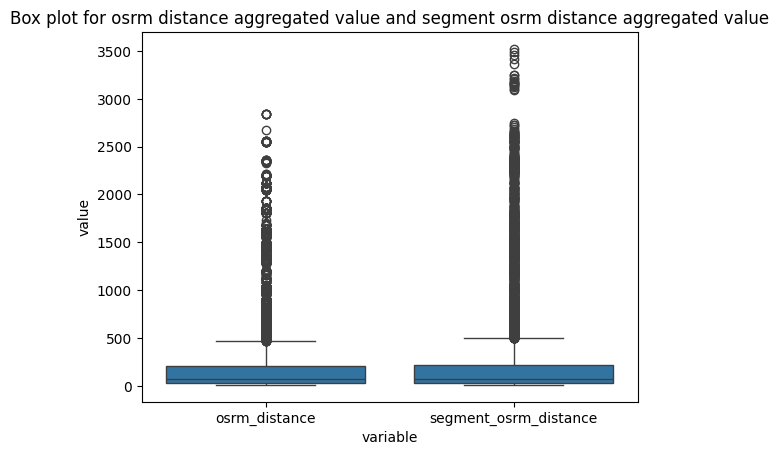

In [495]:
df_melted_3 = pd.melt(df_odav.reset_index(), id_vars = ["trip_uuid"], value_vars = ["osrm_distance", "segment_osrm_distance"])

sns.boxplot(x = "variable", y = "value", data = df_melted_3)

plt.title("Box plot for osrm distance aggregated value and segment osrm distance aggregated value")
plt.show()

In [496]:
df_odav_out = remove_outliers_iqr(df_odav, "diff_osrm_distance_segment_osrm_distance")

In [497]:
df_odav_out.describe()

,index,osrm_distance,segment_osrm_distance,diff_osrm_distance_segment_osrm_distance
count,11642.000000,11642.000000,11642.000000,11642.000000
mean,6960.771345,106.179303,109.061455,2.882152
std,4016.936646,143.249945,144.799905,6.958126
min,1.000000,9.072900,9.072900,-16.560000
25%,3491.250000,27.902875,29.045550,0.000000
50%,6961.500000,46.804600,52.472000,0.003700
75%,10444.750000,135.382300,138.896125,4.597875
max,13885.000000,2191.403700,2191.403700,27.638800


In [498]:
t_statistic, p_value = stats.ttest_rel(df_odav["osrm_distance"], df_odav["segment_osrm_distance"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of osrm_distance and segment_osrm_distance.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means of osrm_distance and segment_osrm_distance.")

t-statistic: -36.326662531995815
p-value: 4.16124894311804e-276
Reject the null hypothesis. There is a significant difference between the means of osrm_distance and segment_osrm_distance.


### hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [499]:
df_otav = df.groupby(["trip_uuid", "destination_center"] )[["osrm_time"]].last()
df_otav = df_otav.reset_index()
df_otav = df_otav.groupby("trip_uuid")["osrm_time"].sum()

In [500]:
df_otav_seg = df.groupby(["trip_uuid"])["segment_osrm_time"].sum()
df_otav = df_otav.reset_index()
df_otav = df_otav.merge(df_otav_seg, left_on='trip_uuid', right_on='trip_uuid')
df_otav = df_otav.reset_index()
df_otav["diff_osrm_time_segment_osrm_time"] = df_otav["segment_osrm_time"] - df_otav["osrm_time"]
df_otav

,index,trip_uuid,osrm_time,segment_osrm_time,diff_osrm_time_segment_osrm_time
0,0,trip-153671041653548748,717.0,1008.0,291.0
1,1,trip-153671042288605164,68.0,65.0,-3.0
2,2,trip-153671043369099517,1740.0,1941.0,201.0
3,3,trip-153671046011330457,15.0,16.0,1.0
4,4,trip-153671052974046625,117.0,115.0,-2.0
...,...,...,...,...,...
13881,13881,trip-153861095625827784,62.0,62.0,0.0
13882,13882,trip-153861104386292051,12.0,11.0,-1.0
13883,13883,trip-153861106442901555,48.0,88.0,40.0
13884,13884,trip-153861115439069069,179.0,221.0,42.0


In [501]:
df_otav.describe()

,index,osrm_time,segment_osrm_time,diff_osrm_time_segment_osrm_time
count,13886.000000,13886.000000,13886.000000,13886.000000
mean,6942.500000,161.361011,181.261270,19.900259
std,4008.687254,272.139846,315.760533,55.656760
min,0.000000,6.000000,6.000000,-22.000000
25%,3471.250000,29.000000,30.000000,-1.000000
50%,6942.500000,60.000000,65.000000,1.000000
75%,10413.750000,168.000000,184.000000,14.000000
max,13885.000000,2032.000000,2564.000000,691.000000


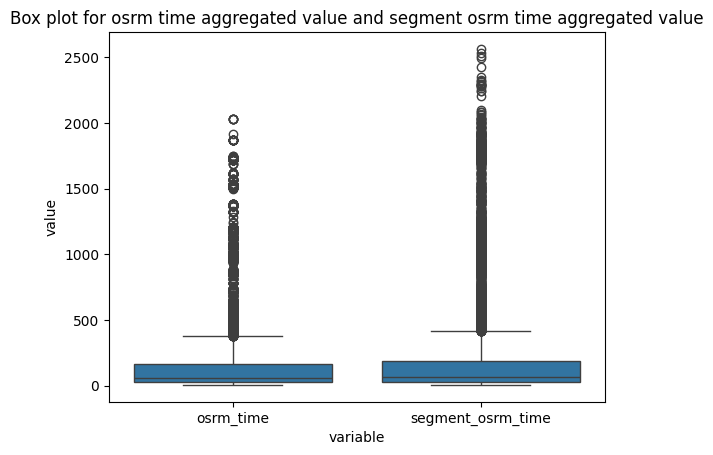

In [502]:
df_melted_5 = pd.melt(df_otav.reset_index(), id_vars = ["trip_uuid"], value_vars = ["osrm_time", "segment_osrm_time"])

sns.boxplot(x = "variable", y = "value", data = df_melted_5)

plt.title("Box plot for osrm time aggregated value and segment osrm time aggregated value")
plt.show()

In [503]:
df_otav_out = remove_outliers_iqr(df_otav, "diff_osrm_time_segment_osrm_time")

In [504]:
df_otav_out.describe()

,index,osrm_time,segment_osrm_time,diff_osrm_time_segment_osrm_time
count,12007.000000,12007.000000,12007.000000,12007.000000
mean,6946.192055,93.731906,97.760140,4.028234
std,4014.461562,119.210060,121.901811,8.497559
min,1.000000,6.000000,6.000000,-22.000000
25%,3483.000000,27.000000,28.000000,-1.000000
50%,6939.000000,50.000000,53.000000,0.000000
75%,10428.500000,120.000000,127.000000,6.000000
max,13885.000000,1611.000000,1611.000000,36.000000


In [505]:
t_statistic, p_value = stats.ttest_rel(df_otav_out["osrm_time"], df_otav_out["segment_osrm_time"])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between osrm time aggregated value and segment osrm time aggregated value.")
else:
    print("Fail to reject the null hypothesis. No significant difference between osrm time aggregated value and segment osrm time aggregated value.")

t-statistic: -51.94427501526367
p-value: 0.0
Reject the null hypothesis. There is a significant difference between osrm time aggregated value and segment osrm time aggregated value.


### Hot encoding of categorical variables

In [506]:
df_route_type = df.groupby("trip_uuid")["route_type"].first()
df_route_type.reset_index()
df_route_type

,route_type
trip_uuid,
trip-153671041653548748,FTL
trip-153671042288605164,Carting
trip-153671043369099517,FTL
trip-153671046011330457,Carting
trip-153671052974046625,FTL
...,...
trip-153861095625827784,Carting
trip-153861104386292051,Carting
trip-153861106442901555,Carting


In [507]:
df_route_type.value_counts()

,count
route_type,
Carting,8363
FTL,5523


In [508]:
df_combined_times['route_type'] = df_combined_times['route_type'].map({'FTL':0, 'Carting':1})
df_combined_times.head()

,trip_uuid,route_type,source_name,trip_start_date,destination_name,trip_end_date,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,trip-153671041653548748,0,MADHYA PRADESH,2018-09-12,HARYANA,2018-09-13,2260.109800,383.759164,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
1,trip-153671042288605164,1,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,181.611874,24.644021,58.0,143.0,141.0,68.0,65.0,85.1110,84.19
2,trip-153671043369099517,0,KARNATAKA,2018-09-12,PUNJAB,2018-09-14,3934.362520,237.439610,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
3,trip-153671046011330457,1,MAHARASHTRA,2018-09-12,MAHARASHTRA,2018-09-12,100.494935,17.175274,100.0,59.0,59.0,15.0,16.0,19.6800,19.88
4,trip-153671052974046625,0,KARNATAKA,2018-09-12,KARNATAKA,2018-09-12,718.349042,41.317614,485.0,341.0,340.0,117.0,115.0,146.7918,146.79


### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [509]:
df_scaled = df_combined_times.copy()
df_scaled = df_scaled.drop(columns = ["trip_uuid", "trip_start_date", "trip_end_date", "source_name", "destination_name"])
df_scaled

,route_type,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,0,2260.109800,383.759164,1260.0,1562.0,1548.0,717.0,1008.0,991.3523,1320.47
1,1,181.611874,24.644021,58.0,143.0,141.0,68.0,65.0,85.1110,84.19
2,0,3934.362520,237.439610,834.0,3347.0,3308.0,1740.0,1941.0,2354.0665,2545.27
3,1,100.494935,17.175274,100.0,59.0,59.0,15.0,16.0,19.6800,19.88
4,0,718.349042,41.317614,485.0,341.0,340.0,117.0,115.0,146.7918,146.79
...,...,...,...,...,...,...,...,...,...,...
13881,1,405.485842,31.261599,105.0,83.0,82.0,62.0,62.0,73.4630,64.86
13882,1,60.590521,15.513784,60.0,21.0,21.0,12.0,11.0,16.0882,16.09
13883,1,422.119867,19.349008,248.0,282.0,281.0,48.0,88.0,58.9037,104.89
13884,1,348.512862,33.673835,91.0,264.0,258.0,179.0,221.0,171.1103,223.53


In [510]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)
df_scaled_data = pd.DataFrame(scaled_data, columns = df_scaled.columns)
df_scaled_data.head()

,route_type,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
0,-1.230534,2.554709,1.086444,1.741011,2.138603,2.136347,2.041814,2.618340,2.118311,2.622455
1,0.812655,-0.545764,-0.350308,-0.602390,-0.380271,-0.382198,-0.343075,-0.368208,-0.321186,-0.333626
2,-1.230534,5.052173,0.501047,0.910488,5.307166,5.286766,5.801046,5.573217,5.786580,5.551087
3,0.812655,-0.666765,-0.380189,-0.520508,-0.529380,-0.528979,-0.537835,-0.523394,-0.497319,-0.487399
4,-1.230534,0.254881,-0.283600,0.230083,-0.028800,-0.025986,-0.163014,-0.209854,-0.155149,-0.183943


In [511]:
df_scaled_data.describe()

,route_type,trip_duration,actual_distance_to_destination,start_scan_to_end_scan,actual_time,accumulated_actual_time,osrm_time,accumulated_osrm_time,osrm_distance,accumulated_osrm_distance
count,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04,1.388600e+04
mean,-4.707614e-17,-3.326032e-17,-2.558486e-17,4.042408e-17,-2.200298e-17,3.019013e-17,-2.046789e-17,-2.149128e-17,-8.391834e-17,6.396215e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-1.230534e+00,-7.816747e-01,-4.128872e-01,-6.764747e-01,-6.181351e-01,-6.184793e-01,-5.709072e-01,-5.550649e-01,-5.258721e-01,-5.132464e-01
25%,-1.230534e+00,-5.911104e-01,-3.675412e-01,-4.971128e-01,-5.151790e-01,-5.164486e-01,-4.863888e-01,-4.790552e-01,-4.676139e-01,-4.571271e-01
50%,8.126555e-01,-3.866052e-01,-3.069456e-01,-3.391964e-01,-3.705079e-01,-3.714578e-01,-3.724727e-01,-3.682077e-01,-3.745716e-01,-3.678191e-01
75%,8.126555e-01,1.860320e-01,-1.457788e-01,3.902316e-02,1.735259e-02,1.697455e-02,2.439638e-02,8.673751e-03,5.075417e-03,-1.508254e-02
max,8.126555e-01,1.096551e+01,7.262452e+00,1.468236e+01,1.048692e+01,1.051718e+01,6.874063e+00,7.546303e+00,7.094874e+00,7.890454e+00


## INSIGHTS:

1.   The data is of 23 Days starting from 2018-09-12 and ending on 2018-10-04.
2.   The data has 136557 entries across 24 columns. But the analysis is performed on 136059 after removing some incomplete rows/data.
3. No packages were returned to source location. That means all the packages were transported and delivered as destination.
4. **13886 trips were made during these 23 days.**
5. Most busy day was 2018-09-15, on which 775 trips were made.
6. **Maharashtra is the busiest state in terms of trips which are made from and to state, followed by Karnataka and Haryana.**
7.  Nagaland is the least busiest state handling 5 trips as source_center and 1 trips as destination_center. It is followed by Mizoram.
8. **The busiest inter-city corridor is Delhi - Haryana with trip_count of 378, avg_time for trip of 142.15 and avg_distance of 41.3**
9. Based on Hypothesis tests done between:

  *   trip_duration and start_scan_to_end_scan
  *   actual_time aggregated value and OSRM time aggregated value
  *   actual_time aggregated value and segment actual time aggregated value
  *   osrm distance aggregated value and segment osrm distance aggregated value
  *   osrm time aggregated value and segment osrm time aggregated value

  **It is observed that there is significant difference betweeen actual values and OSRM values.**

10. Frequency of Carting is 8363 and FTL 5523 for the trips.



## RECOMMENDATIONS:

1.   Looking at the data, it can be seen that the number of trips were mostly in the range of 500 to 600. It can be incresed to 700 - 800 range with better planning and management for better business and profits.
2.   **Maharashtra, Karnataka, and Haryana are strong states for business since they have the most trips IN and OUT. We need to focus on these states to make a robust model which we can replicate in other target states and futher move on to international trips.**
3. Eastern states have very few trips. It may be mostly due to limitations in mode of transportation or difficulty in movement. We need to study local geography of these states and innovate to create more trips in these States to increase foothold and provide our service before competetion.
4. Inter-state trip is comparatively less that inter-city trips as seen from number of inter-city trips (Maharashta at more than 2000 trips) and number of inter-state trips (DELHI - HARYANA - 378 trips). We should tap the business opportunity of inter-state trip and move on to international trips.
5. The algorithm used for calculating the OSRM parameters should be optimized to have it more closer to actual parameters. This will lead us to better management of trips setting better customer satisfaction.


